<a href="https://colab.research.google.com/github/Teoroo-CMC/DoE_Course_Material/blob/main/Week_2/Workshop_extra/Jupyter-notebooks/probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability
(adapted from CHEM 1000 - Spring 2023 Prof. Geoffrey Hutchison, University of Pittsburgh)

Chapter 9 in [*Mathematical Methods for Chemists*][def]

By the end of this session, you should be able to:
- Understand the binomial and multinomial processes
- Compute cumulative chances (e.g., lottery)
- Understand calculating moments from probability distributions
  - Mean, variance, skew, and kurtosis

[def]: http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/

## Randomness, Probability and Chemistry

A common technique in simulating chemistry and physical behavior is called [Monte Carlo](https://en.wikipedia.org/wiki/Monte_Carlo_method) - essentially using random processes to solve complicated problems. For example, one can randomly sample many possible shapes of a polymer or sample from multiple possible arrangements in a nanoparticle, etc.

I will assume you have some background in probability and statistics and focus only on some key areas.

### Coin Flips and Binomial Distribution

We're generally familiar with *descrete* random numbers, like flipping a coin heads or tails.

If we flip a coin once, it's 1/2 chance of heads or tails.

Over multiple events - each one is independent - the probability of a particular number of heads (n) in a total of N flips is:

\begin{equation}
p(n, N) =\frac{1}{2^{N}} \frac{N !}{n !(N-n) !}
\end{equation}

For 6 flips, this looks like:

Image from [*Mathematical Methods for Chemists*](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/)

<img src="./images/binomial.png" width="350" />

We can calculate the counts either using the formula above, or via [Pascal's Triangle](https://en.wikipedia.org/wiki/Pascal%27s_triangle)

<img src="images/pascal-triangle.png" width="350" />

We can relate coin-flips with electron spin or nuclear spin (for NMR), etc. For example, given 3 unpaired electrons, how many arrangements are there?

- Up, Up, Up
- Up, Up, Down
.. (etc)


### Multinomial Probability

Obviously we don't just flip coins (or electrons) so we also need to consider a multinomial distribution (i.e., rolling a 6-sided dice, or a system that can be in multiple equivalent states):

<img src="./images/dice.jpg" width="350" />

For example, if we roll a six-sided die, 5 times how many ways can we get 2 ones and 3 sixes (1 1 6 6 6):

\begin{equation}
W(2,0,0,0,0,3 ; 5)=\frac{5 !}{2 ! 0 ! 0 ! 0 ! 0 ! 3 !}=10
\end{equation}

(Important to remember that 0! = 1)

## Cumulative Probability

One common real-world probability question is about cumulative chances.

My son came to me, asking about an iPad game where he can win a prize every time he opens a gift. Each gift has a chance of winning the prize. So he asks me if he buys 30 gifts, what's the chance he'll win the super-awesome dragon?

That's a cumulative probability - he doesn't care *which* gift gives him the dragon, only that one of the thirty gifts works.

Here's the catch - the game only gives dragons with 1% chance - you're more likely to get other prizes.

While there's a formula, it's really, really easy to compute this with a for() loop.
- what's the total cumulative chance?
- what's the chance we didn't get the prize on the last round

e.g.
- first time through, there's a 1% chance of a win
- second time, there was a 99% chance we didn't win, times the 1% chance I win on this round = 0.99% chance on this gift
- third time, there's a 99.01% we didn't win on the 2nd round, times the 1% chance on the 3rd round
- etc.

In [1]:
# help danny
total = 0.0 # start out with no chance to win the prize
missed = 1.0 # i.e., he doesn't have the prize yet
chance = 0.01 # chance of winning each time he opens the gift

for egg in range(1,31): # remember the loop will go from start to end - 1 = 30
    total = total + chance * missed
    missed = missed * (1.0 - chance)
    print(egg, round(total, 4))

1 0.01
2 0.0199
3 0.0297
4 0.0394
5 0.049
6 0.0585
7 0.0679
8 0.0773
9 0.0865
10 0.0956
11 0.1047
12 0.1136
13 0.1225
14 0.1313
15 0.1399
16 0.1485
17 0.1571
18 0.1655
19 0.1738
20 0.1821
21 0.1903
22 0.1984
23 0.2064
24 0.2143
25 0.2222
26 0.23
27 0.2377
28 0.2453
29 0.2528
30 0.2603


Notice that even though there are 30 gifts, his cumulative probability is **not** 30 * 0.01, but lower...

Not surprisingly, he decides a 26% chance of getting a dragon isn't very good and he picks a different game.

No dragons, but this new game has a 4% chance of winning each time he plays.

How long does he have to go for a good chance of winning a prize?

In [2]:
# is this a better game?
total = 0.0 # start out with no chance to win the prize
missed = 1.0 # i.e., he doesn't have the prize yet
chance = 0.04 # chance of winning each time he opens the gift

for egg in range(1,21): # remember the loop will go from start to end - 1 = 20
    total = total + chance * missed
    missed = missed * (1.0 - chance)
    print(egg, round(total, 4))

1 0.04
2 0.0784
3 0.1153
4 0.1507
5 0.1846
6 0.2172
7 0.2486
8 0.2786
9 0.3075
10 0.3352
11 0.3618
12 0.3873
13 0.4118
14 0.4353
15 0.4579
16 0.4796
17 0.5004
18 0.5204
19 0.5396
20 0.558


So it's 17 rounds before we break 50% so it's clearly better than the first game. Still, the cumulative chance is not N * 0.04...

(Danny decided neither game was worth the money, incidentally.)

## Moments from Distributions

Sometimes people will discuss "[*moments*](https://en.wikipedia.org/wiki/Moment_(mathematics))" of probability distributions or statistical distributions.

These are related to the shape of the distribution.
- the "zeroth" moment is the total (e.g., for a probability it should be 1 = 100%)
- first moment is the [mean](https://en.wikipedia.org/wiki/Expected_value) $\mu$ (i.e., the center or "expected value")
- second moment is the [variance](https://en.wikipedia.org/wiki/Variance) $\sigma^2$ (i.e., the width)
    - you're probably more familiar with the standard deviation $\sigma$
- third moment is the [skewness](https://en.wikipedia.org/wiki/Skewness) (i.e., the asymmetry of the distribution)
- fourth moment, the [kurtosis](https://en.wikipedia.org/wiki/Kurtosis) (i.e., how thin or thick the "tail" of the distribution)

In general, the mean, variance (or standard deviation which is the square root of the variance) and the skewness are the most useful measures of a distribution.

### Skewness

Not all distributions are "normal" or symmetric. For example, the number of people waiting for a bus is never negative. Even if I tell you the average is 5 people in the morning, sometimes it's zero (when the bus just arrived) and it's sometimes much higher (right before the bus comes and someone runs to catch it).

Image from Wikipedia:
<a href="https://commons.wikimedia.org/wiki/File:Negative_and_positive_skew_diagrams_(English).svg#/media/File:Negative_and_positive_skew_diagrams_(English).svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/1200px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" alt="Negative and positive skew diagrams (English).svg"></a>

### Kurtosis

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, distributions with high kurtosis tend to have many outliers.

This is probably easier to plot:

In [4]:
# let's plot this
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%config InlineBackend.figure_format = 'retina'
#plt.style.use('../lectures/chem1000.mplstyle')

In [5]:
# generate a "normal" distribution

mu, sigma = 0, 0.1 # mean and standard deviation
points = np.random.normal(mu, sigma, 1000) # 1,000 points from a normal distribution

In [6]:
import scipy.stats

print('mean', np.mean(points))
print('variance', np.var(points)) # variance

print('skewness', scipy.stats.skew(points))
print('kurtosis', scipy.stats.kurtosis(points))

mean -0.0009372221755259258
variance 0.010125921001206134
skewness -0.07177896828393618
kurtosis 0.22529637910369615


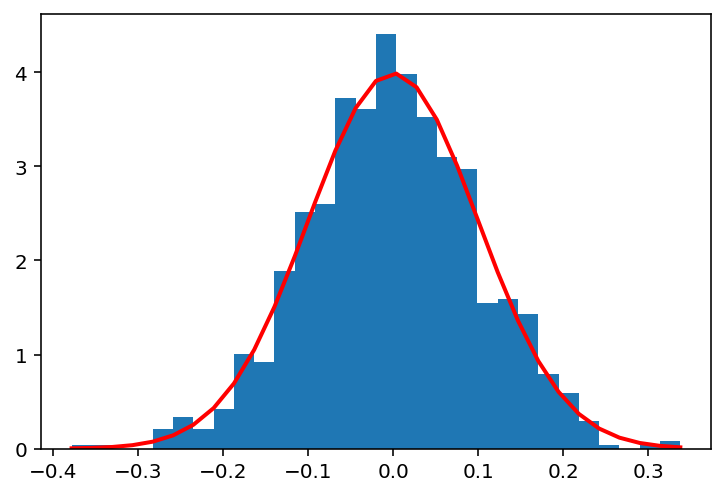

In [7]:
count, bins, ignored = plt.hist(points, 30, density=True)

# add a red line with the perfect curve from a Gaussian distribution
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

plt.show()

In [8]:
# here's a different distribution (Cauchy - the same as a Lorentzian peak in spectra)
from scipy.stats import cauchy

mu, sigma = 0, 0.1 # mean and standard deviation
points = cauchy.rvs(mu, sigma, 1000)

print('mean', np.mean(points))
print('variance', np.var(points)) # variance

print('skew', scipy.stats.skew(points))
print('kurtosis', scipy.stats.kurtosis(points))

mean 0.13509467292527239
variance 23.227873855745354
skew 12.962948939738684
kurtosis 361.46330594352276


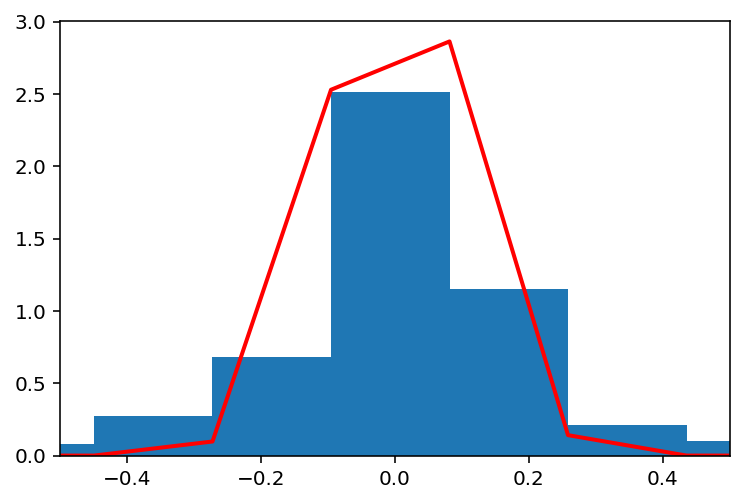

In [9]:
count, bins, ignored = plt.hist(points, 1000, density=True)

# add a red line with the perfect curve from a Gaussian distribution
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

plt.xlim(-0.5, 0.5)
plt.show()

Notice that there's not as much in the middle and more on the outside? That's **kurtosis**.

Can we generate some skew?

Yes, there are many kinds of distributions, including intentionally skewed distributions

In [10]:
from scipy.stats import skewnorm

mu, sigma = 0, 0.1 # mean and standard deviation
asym = 4 # skew parameter
points = skewnorm.rvs(asym, mu, sigma, 1000)

print('mean', np.mean(points))
print('variance', np.var(points)) # variance

print('skew', scipy.stats.skew(points))
print('kurtosis', scipy.stats.kurtosis(points))

mean 0.0807050457284181
variance 0.004164680047601254
skew 0.8467052810240133
kurtosis 0.9351843579697081


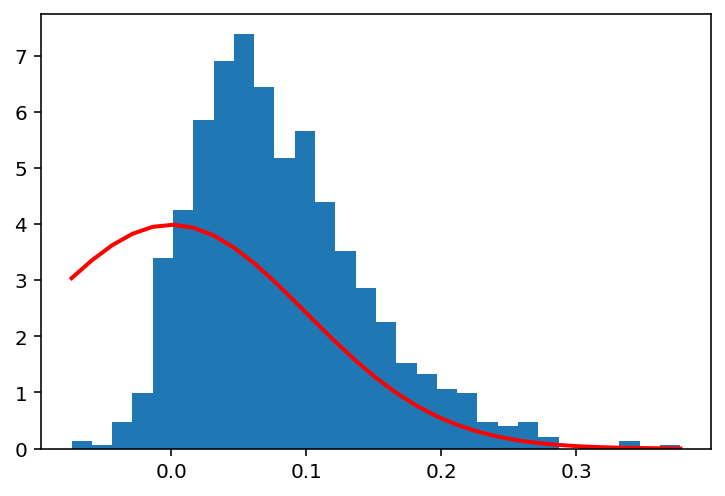

In [11]:
count, bins, ignored = plt.hist(points, 30, density=True)

# add a red line with the perfect curve from a Gaussian distribution
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

plt.show()

## Common Probability Distributions

The following are all continuous distributions:

- Uniform random (`scipy.stats.uniform`)
- Gaussian / normal (`scipy.stats.norm`)
- Cauchy (Lorentzian) (`scipy.stats.cauchy`)
- Exponential (`scipy.stats.expon`)
  - example: exponential decay of radioactive elements

The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) and [binomial distribution](https://en.wikipedia.org/wiki/Poisson_distribution) are discrete probability distributions (e.g., 5 people at the bus stop, or 6 heads when flipping coins).

## Calculating Mean, Variance, etc. for a Probability Distribution

When we have discrete data, it's easy to calculate a mean. We add up the values and divide by the count. However, it's not so hard when we have a continuous probability distribution either.

Consider an equivalent way to calculate the mean - it's the value times the probability (e.g., a weighted mean):

\begin{equation}
\bar{x}=\sum_{k=1}^{n} x_{k} p_{k}
\end{equation}

In other words, we add up the values times the probability of occurring.

With a continuous probability distribution, we "just" change the sum to an integral.

\begin{equation}
\sum_{k} p_{k} \rightarrow \int p(x) d x
\end{equation}

So now if we want to calculate the mean of a probability distribution, we need:

\begin{equation}
\int x p(x) dx
\end{equation}

For example:

\begin{equation}
\bar{x}=\int_{a}^{b} x p(x) d x
\end{equation}

Similarly, if we want the average of $x^2$ we can use:
\begin{equation}
\overline{x^{2}}=\int_{a}^{b} x^{2} p(x) d x
\end{equation}

To calculate the variance, we need:
\begin{equation}
\sigma_{x}^{2}=\overline{(x-\bar{x})^{2}}=\overline{x^{2}}-(\bar{x})^{2}
\end{equation}

That might look confusing, but just means we want the difference:
- the average of $x^2$
- the average of $x$ and then square that number

Below I've taken the integrals for the particle in a box, e.g.:

\begin{equation}
p(x) = \psi^*\psi = \frac{2}{L} \sin^2 (\frac{n \pi x}{L})
\end{equation}

In [18]:
import warnings
warnings.filterwarnings("ignore")

from sympy import init_session
init_session()

IPython console for SymPy 1.9 (Python 3.9.7-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [19]:
L = symbols('L')
f = 2*x * sin(n*pi*x/L)**2/L
simplify(integrate(f, (x, 0, L)))

⎧L           
⎪─  for n ≠ 0
⎨2           
⎪            
⎩0  otherwise

In [14]:
x_sq = 2*x**2*sin(n*pi*x/L)**2 / L
simplify(integrate(x_sq, (x, 0, L)))

⎧ 2       2             
⎪L       L              
⎪── - ───────  for n ≠ 0
⎨3       2  2           
⎪     2⋅π ⋅n            
⎪                       
⎩     0        otherwise

In [15]:
# variance = average(x**2) - average(x)**2
var = integrate(x_sq, (x, 0, L)) - integrate(f, (x, 0, L))**2
simplify(var)

⎧ 2 ⎛      6  ⎞           
⎪L ⋅⎜1 - ─────⎟           
⎪   ⎜     2  2⎟           
⎪   ⎝    π ⋅n ⎠           
⎨──────────────  for n ≠ 0
⎪      12                 
⎪                         
⎪      0         otherwise
⎩                         

-------
This notebook is adapted from Prof. Geoffrey Hutchison, University of Pittsburgh
https://github.com/ghutchis/chem1000

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>